<a href="https://colab.research.google.com/github/hitz02/Analytics_Vidhya_Loan_Prediction/blob/master/Lead_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
from pycaret.classification import *

In [4]:
# !pip install pycaret[full]

In [5]:
# # # uninstall lightgbm CPU
# !pip uninstall lightgbm -y

# # # install lightgbm GPU
# !pip install lightgbm --install-option=--gpu --install-option="--opencl-include-dir=/usr/local/cuda/include/" --install-option="--opencl-library=/usr/local/cuda/lib64/libOpenCL.so"

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.shape

(245725, 11)

In [4]:
train_sample = train.sample(frac=0.05,random_state=123)

In [5]:
train_sample.shape

(12286, 11)

In [6]:
train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [8]:
# train[['Is_Lead','Region_Code']].value_counts()

In [38]:
np.mean(train[train['Is_Lead']==1]['Age'])

49.99394386494647

In [7]:
train_sample.Is_Lead.value_counts()
# /train_sample.shape[0]

0    9267
1    3019
Name: Is_Lead, dtype: int64

In [33]:
train_sample.isna().sum()

ID                        0
Gender                    0
Age                       0
Region_Code               0
Occupation                0
Channel_Code              0
Vintage                   0
Credit_Product         1500
Avg_Account_Balance       0
Is_Active                 0
Is_Lead                   0
dtype: int64

In [17]:
train.Is_Lead.value_counts()

0    187437
1     58288
Name: Is_Lead, dtype: int64

In [24]:
from imblearn.under_sampling import *
from imblearn.over_sampling import *

# rus = RandomUnderSampler(random_state=0)
# tl = TomekLinks(n_jobs=-1)
enn = EditedNearestNeighbours(n_jobs=-1,kind_sel='mode')
# renn = RepeatedEditedNearestNeighbours(n_jobs=-1,kind_sel='all')
# ncr = NeighbourhoodCleaningRule(n_jobs=-1,kind_sel='mode')
# ada = ADASYN(random_state=42)
# sm = SVMSMOTE(random_state=42)

In [25]:
classification_setup = setup(data = train_sample.iloc[:,1:]
                             ,target = 'Is_Lead'
                            #  ,remove_multicollinearity=True
                             ,normalize=True
                             ,normalize_method='robust'
                             ,remove_outliers=True
                             ,fix_imbalance=True
                             ,fix_imbalance_method=enn
                             ,feature_interaction=True
                             ,feature_ratio=True
                             ,feature_selection=True
                             ,feature_selection_threshold=0.4
                             ,polynomial_features=True
                             ,trigonometry_features=True
                             ,use_gpu=True
                             ,fold = 7
                             )

,Description,Value
0,session_id,3511
1,Target,Is_Lead
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(12286, 10)"
5,Missing Values,True
6,Numeric Features,3
7,Categorical Features,6
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
# top3 = compare_models(n_select=3,include = ['lightgbm','gbc'],sort='AUC')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8611,0.8734,0.5435,0.8074,0.6495,0.5670,0.5844,0.4630
gbc,Gradient Boosting Classifier,0.8607,0.8721,0.5309,0.8173,0.6436,0.5618,0.5821,3.2950
ada,Ada Boost Classifier,0.8562,0.8651,0.5032,0.8204,0.6238,0.5411,0.5659,0.9770
rf,Random Forest Classifier,0.8513,0.8540,0.5678,0.7440,0.6440,0.5522,0.5602,2.7710
et,Extra Trees Classifier,0.8362,0.8378,0.5689,0.6863,0.6220,0.5187,0.5225,3.5470
dt,Decision Tree Classifier,0.7869,0.7099,0.5636,0.5490,0.5562,0.4160,0.4161,0.4370
lr,Logistic Regression,0.7631,0.4477,0.0000,0.0000,0.0000,0.0000,0.0000,0.1110


In [11]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [26]:
top5 = compare_models(n_select=5
                    # ,exclude = ['qda','lda','lr']
                    ,include=['gbc','catboost','ada','mlp']
                    ,sort='AUC')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8565,0.8779,0.6539,0.7429,0.6952,0.6019,0.6043,2.9471
catboost,CatBoost Classifier,0.8559,0.8767,0.6613,0.7367,0.6964,0.6024,0.6043,6.8043
ada,Ada Boost Classifier,0.8529,0.8743,0.6285,0.7451,0.6813,0.5866,0.5906,1.4357
mlp,MLP Classifier,0.8297,0.8468,0.6716,0.6587,0.6641,0.5502,0.5510,20.4200


In [68]:
top5 = compare_models(n_select=5
                    # ,exclude = ['qda','lda','lr']
                    ,include=['gbc','lightgbm','catboost','ada','mlp']
                    # ,include=['ridge','lightgbm','et']
                    ,sort='AUC')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8512,0.8744,0.6801,0.7034,0.6914,0.5934,0.5937,2.8686
catboost,CatBoost Classifier,0.8485,0.8709,0.7011,0.6878,0.6942,0.5935,0.5937,6.5571
ada,Ada Boost Classifier,0.8531,0.8688,0.6552,0.7213,0.6864,0.5908,0.5922,1.7057
mlp,MLP Classifier,0.8502,0.8674,0.6971,0.6950,0.6957,0.5964,0.5966,6.3700
lightgbm,Light Gradient Boosting Machine,0.8459,0.8665,0.7061,0.6793,0.6922,0.5895,0.5899,1.8786


In [67]:
top3 = compare_models(n_select=3
                    # ,exclude = ['catboost','lda','lr']
                    # ,include=['catboost','lightgbm','xgboost']
                    ,include=['catboost','lda','mlp']
                    ,sort='AUC')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.8485,0.8709,0.7011,0.6878,0.6942,0.5935,0.5937,6.5271
mlp,MLP Classifier,0.8502,0.8674,0.6971,0.6950,0.6957,0.5964,0.5966,6.2100
lda,Linear Discriminant Analysis,0.8536,0.8660,0.6492,0.7262,0.6851,0.5902,0.5920,1.3671


In [13]:
top3_2 = compare_models(n_select=3
                    # ,exclude = ['catboost','lda','lr']
                    # ,include=['catboost','lightgbm','xgboost']
                    ,include=['svm','knn','gbc']
                    ,sort='AUC')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8580,0.8714,0.6071,0.7483,0.6702,0.5810,0.5862,10.405
knn,K Neighbors Classifier,0.8338,0.8182,0.6068,0.6652,0.6345,0.5273,0.5283,7.093
svm,SVM - Linear Kernel,0.8446,0.0000,0.4979,0.7947,0.6050,0.5147,0.5410,5.196


In [37]:
# # blend individual models
blend_model = blend_models(estimator_list = top5, method = 'soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8553,0.8671,0.6471,0.7362,0.6888,0.5950,0.5971
1,0.8552,0.8559,0.6540,0.7326,0.6910,0.5969,0.5985
2,0.8620,0.8863,0.6540,0.7560,0.7013,0.6122,0.6149
3,0.8415,0.8714,0.6424,0.6929,0.6667,0.5629,0.5636
4,0.8586,0.8726,0.6319,0.7552,0.6881,0.5976,0.6016
5,0.8757,0.8820,0.6285,0.8265,0.7140,0.6365,0.6462
6,0.8423,0.8528,0.6146,0.7080,0.6580,0.5562,0.5586
Mean,0.8558,0.8697,0.6389,0.7439,0.6868,0.5939,0.5972
SD,0.0109,0.0115,0.0135,0.0400,0.0178,0.0255,0.0277


In [38]:
# model = create_model('lightgbm', fold = 10, verbose = True)

In [13]:
tuned_model = tune_model(model, optimize = 'AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7960,0.8853,0.8414,0.5479,0.6636,0.5264,0.5514
1,0.8008,0.8737,0.8207,0.5564,0.6632,0.5291,0.5492
2,0.7895,0.8656,0.7990,0.5403,0.6446,0.5029,0.5223
3,0.7876,0.8690,0.8079,0.5370,0.6452,0.5023,0.5236
4,0.7879,0.8691,0.7964,0.5381,0.6422,0.4994,0.5188
5,0.7956,0.8700,0.7990,0.5498,0.6514,0.5137,0.5316
6,0.8029,0.8786,0.8233,0.5596,0.6663,0.5336,0.5536
7,0.7944,0.8612,0.7900,0.5484,0.6474,0.5089,0.5258
8,0.7925,0.8749,0.8143,0.5441,0.6523,0.5127,0.5339
9,0.7879,0.8646,0.7875,0.5385,0.6396,0.4968,0.5148


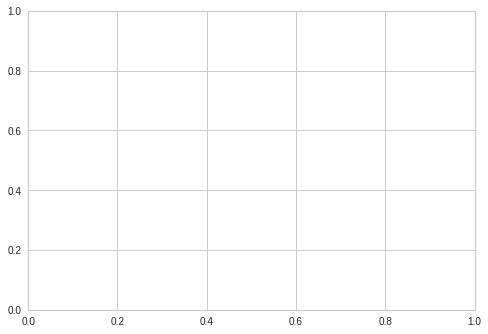

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [66]:
evaluate_model(model)

In [27]:
# make predictions
predictions = pycaret.classification.predict_model(top5[0], data=test.iloc[:,1:])
# view the predictions
# predictions

In [28]:
predictions.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Label,Score
0,Male,29,RG254,Other,X1,25,Yes,742366,No,0,0.8963
1,Male,43,RG268,Other,X2,49,NaN,925537,No,1,0.9782
2,Male,31,RG270,Salaried,X1,14,No,215949,No,0,0.9606
3,Male,29,RG272,Other,X1,33,No,868070,No,0,0.9664
4,Female,29,RG270,Other,X1,19,No,657087,No,0,0.9662


In [29]:
predictions.shape

(105312, 11)

In [30]:
sub = pd.concat([test['ID'],predictions['Label']],axis=1)

In [31]:
sub.columns = ['ID','Is_Lead']

In [32]:
sub.to_csv('sub8.csv',index=False)